# Proyecto. Ciencia de Datos
## Brian Gabriel Barajas Guerrero


The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city.
Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) 

Attribute Information:

0-Date (DD/MM/YYYY) 
1-Time (HH.MM.SS)
2-True hourly averaged concentration CO in mg/m^3 (reference analyzer)
3-PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
4-True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
5-True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
6-PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
7-True hourly averaged NOx concentration in ppb (reference analyzer)
8-PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
9-True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
10-PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
11-PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
12-Temperature in Â°C
13-Relative Humidity (%)
14-AH Absolute Humidity

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

%matplotlib inline

In [2]:
pip install -U scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [107]:
df = pd.read_csv("Downloads\ewC\Air_Quality.csv")
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object

In [108]:
#df.dropna(axis=0, how='any')
df =df.dropna(axis=0, how='all') 
df = df.drop('Unnamed: 15',axis=1)
df = df.drop('Unnamed: 16',axis=1)
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10:00:00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11:00:00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12:00:00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13:00:00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [109]:
d=df["NMHC(GT)"].replace(-200, pd.NaT)
d.fillna(d.median(), inplace=True)
print(d.mean())
print(d)
df["NMHC(GT)"]=d

156.72159880303516
0       150.0
1       112.0
2        88.0
3        80.0
4        51.0
        ...  
9352    150.0
9353    150.0
9354    150.0
9355    150.0
9356    150.0
Name: NMHC(GT), Length: 9357, dtype: float64


In [110]:
for i in df:
    #a=df[i][0]
    #print(type(a))
    if type(df[i][0]) == np.float64:
        #print("si")
        d=df[i].replace(-200, pd.NaT)
        d.fillna(d.median(), inplace=True)
        df[i]=d
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10:00:00,3.1,1314.0,150.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11:00:00,2.4,1163.0,150.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12:00:00,2.4,1142.0,150.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13:00:00,2.1,1003.0,150.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [8]:

df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.089302,1098.392433,156.721599,10.009447,937.973923,235.178903,834.339959,112.373303,1456.528054,1020.562894,18.297574,49.248509,1.024352
std,1.323024,212.911465,67.058156,7.311771,261.625561,195.091025,251.808888,43.948519,339.370072,390.784960,8.658221,16.974949,0.395878
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.200000,941.000000,150.000000,4.600000,743.000000,112.000000,666.000000,86.000000,1242.000000,742.000000,12.000000,36.600000,0.746100
50%,1.800000,1063.000000,150.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,2.600000,1221.000000,150.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [9]:

df_diario = df.drop('Time',axis=1)
df_diario.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.089302,1098.392433,156.721599,10.009447,937.973923,235.178903,834.339959,112.373303,1456.528054,1020.562894,18.297574,49.248509,1.024352
std,1.323024,212.911465,67.058156,7.311771,261.625561,195.091025,251.808888,43.948519,339.370072,390.784960,8.658221,16.974949,0.395878
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.200000,941.000000,150.000000,4.600000,743.000000,112.000000,666.000000,86.000000,1242.000000,742.000000,12.000000,36.600000,0.746100
50%,1.800000,1063.000000,150.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,2.600000,1221.000000,150.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [10]:

df1 = df_diario.loc[0:1213]
df2 =  df_diario.loc[1213:2213]
df3 =  df_diario.loc[2213:3213]
df4 =  df_diario.loc[3213:4213]
df5 =  df_diario.loc[4213:5213]
df6 =  df_diario.loc[5213:6213]
df7 =  df_diario.loc[6213:7213]
df8 =  df_diario.loc[7213:8213]
df9 =  df_diario.loc[8213:9356]

df1=df1.groupby('Date').sum()
df2=df2.groupby('Date').sum()
df3=df3.groupby('Date').sum()
df4=df4.groupby('Date').sum()
df5=df5.groupby('Date').sum()
df6=df6.groupby('Date').sum()
df7=df7.groupby('Date').sum()
df8=df8.groupby('Date').sum()
df9=df9.groupby('Date').sum()

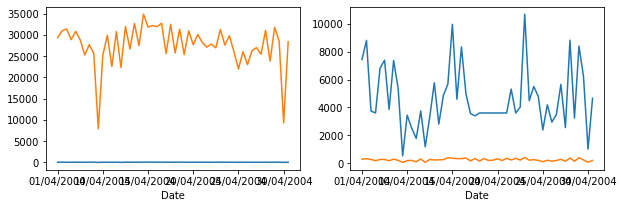

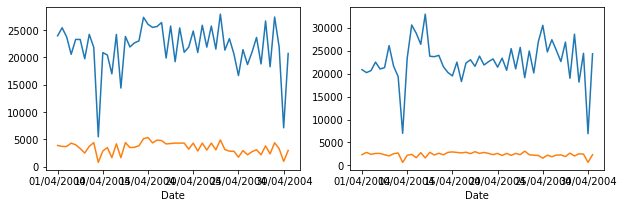

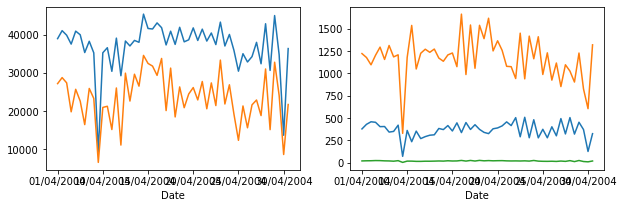

In [11]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
df1[['CO(GT)', 'PT08.S1(CO)']].plot(ax = ax[0])
#ax[0].set_title('Random int')
ax[0].get_legend().remove()

df1[['NMHC(GT)', 'C6H6(GT)']].plot(ax = ax[1])
#ax[1].set_title('Random normal')
ax[1].get_legend().remove()

fig, ax = plt.subplots(1,2, figsize=(10,3))
df1[['PT08.S2(NMHC)', 'NOx(GT)']].plot(ax = ax[0])
#ax[0].set_title('Random normal')
ax[0].get_legend().remove()

df1[['PT08.S3(NOx)', 'NO2(GT)']].plot(ax = ax[1])
#ax[1].set_title('Random normal')
ax[1].get_legend().remove()

fig, ax = plt.subplots(1,2, figsize=(10,3))
df1[['PT08.S4(NO2)', 'PT08.S5(O3)']].plot(ax = ax[0])
#ax[0].set_title('Random normal')
ax[0].get_legend().remove()

df1[['T', 'RH', 'AH']].plot(ax = ax[1])
#ax[1].set_title('Random normal')
ax[1].get_legend().remove()




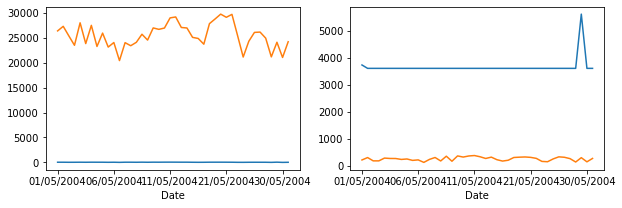

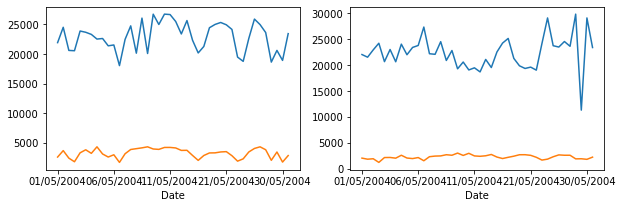

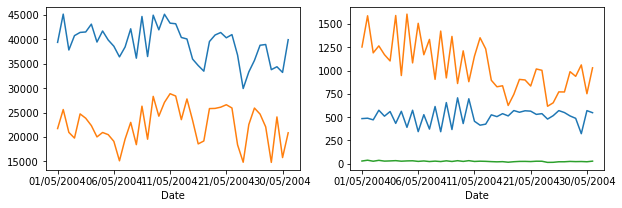

In [12]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
df2[['CO(GT)', 'PT08.S1(CO)']].plot(ax = ax[0])
#ax[0].set_title('Random int')
ax[0].get_legend().remove()

df2[['NMHC(GT)', 'C6H6(GT)']].plot(ax = ax[1])
#ax[1].set_title('Random normal')
ax[1].get_legend().remove()

fig, ax = plt.subplots(1,2, figsize=(10,3))
df2[['PT08.S2(NMHC)', 'NOx(GT)']].plot(ax = ax[0])
#ax[0].set_title('Random normal')
ax[0].get_legend().remove()

df2[['PT08.S3(NOx)', 'NO2(GT)']].plot(ax = ax[1])
#ax[1].set_title('Random normal')
ax[1].get_legend().remove()

fig, ax = plt.subplots(1,2, figsize=(10,3))
df2[['PT08.S4(NO2)', 'PT08.S5(O3)']].plot(ax = ax[0])
#ax[0].set_title('Random normal')
ax[0].get_legend().remove()

df2[['T', 'RH', 'AH']].plot(ax = ax[1])
#ax[1].set_title('Random normal')
ax[1].get_legend().remove()


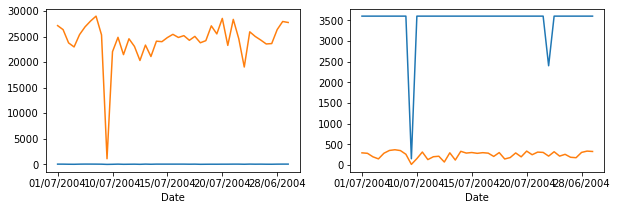

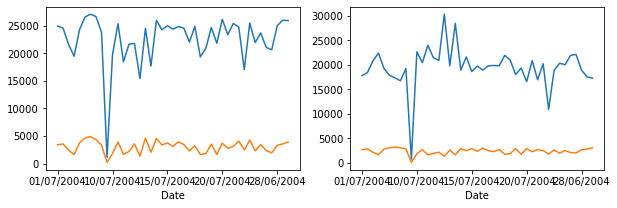

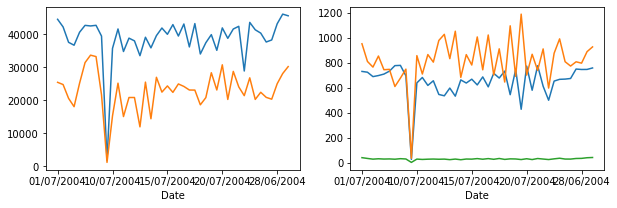

In [13]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
df3[['CO(GT)', 'PT08.S1(CO)']].plot(ax = ax[0])
#ax[0].set_title('Random int')
ax[0].get_legend().remove()

df3[['NMHC(GT)', 'C6H6(GT)']].plot(ax = ax[1])
#ax[1].set_title('Random normal')
ax[1].get_legend().remove()

fig, ax = plt.subplots(1,2, figsize=(10,3))
df3[['PT08.S2(NMHC)', 'NOx(GT)']].plot(ax = ax[0])
#ax[0].set_title('Random normal')
ax[0].get_legend().remove()

df3[['PT08.S3(NOx)', 'NO2(GT)']].plot(ax = ax[1])
#ax[1].set_title('Random normal')
ax[1].get_legend().remove()

fig, ax = plt.subplots(1,2, figsize=(10,3))
df3[['PT08.S4(NO2)', 'PT08.S5(O3)']].plot(ax = ax[0])
#ax[0].set_title('Random normal')
ax[0].get_legend().remove()

df3[['T', 'RH', 'AH']].plot(ax = ax[1])
#ax[1].set_title('Random normal')
ax[1].get_legend().remove()


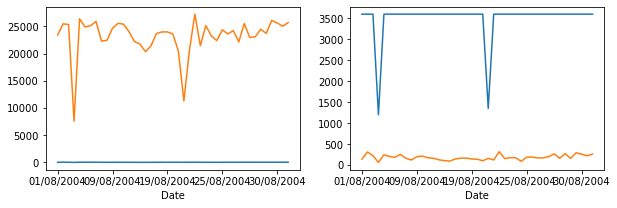

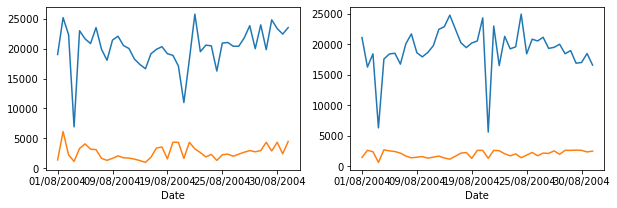

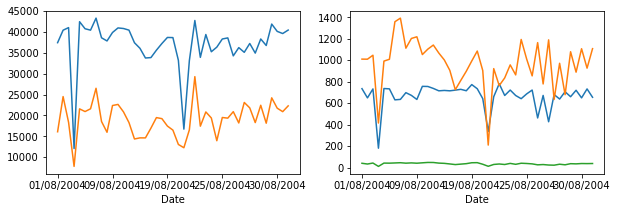

In [14]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
df4[['CO(GT)', 'PT08.S1(CO)']].plot(ax = ax[0])
#ax[0].set_title('Random int')
ax[0].get_legend().remove()

df4[['NMHC(GT)', 'C6H6(GT)']].plot(ax = ax[1])
#ax[1].set_title('Random normal')
ax[1].get_legend().remove()

fig, ax = plt.subplots(1,2, figsize=(10,3))
df4[['PT08.S2(NMHC)', 'NOx(GT)']].plot(ax = ax[0])
#ax[0].set_title('Random normal')
ax[0].get_legend().remove()

df4[['PT08.S3(NOx)', 'NO2(GT)']].plot(ax = ax[1])
#ax[1].set_title('Random normal')
ax[1].get_legend().remove()

fig, ax = plt.subplots(1,2, figsize=(10,3))
df4[['PT08.S4(NO2)', 'PT08.S5(O3)']].plot(ax = ax[0])
#ax[0].set_title('Random normal')
ax[0].get_legend().remove()

df4[['T', 'RH', 'AH']].plot(ax = ax[1])
#ax[1].set_title('Random normal')
ax[1].get_legend().remove()


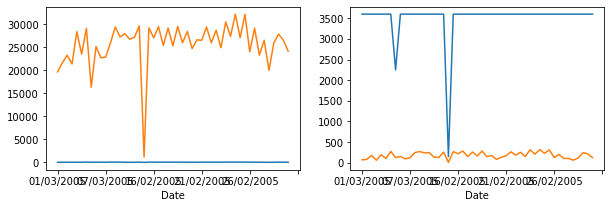

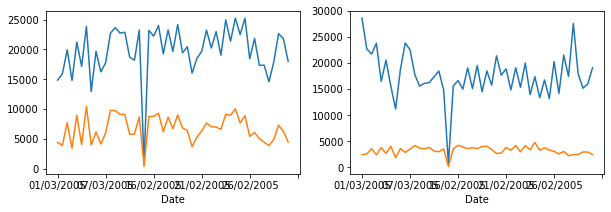

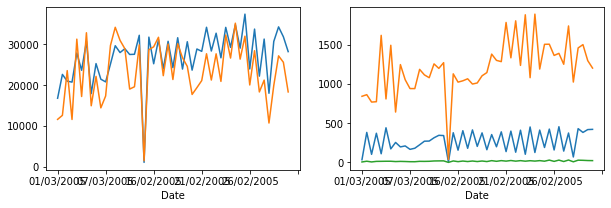

In [15]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
df9[['CO(GT)', 'PT08.S1(CO)']].plot(ax = ax[0])
#ax[0].set_title('Random int')
ax[0].get_legend().remove()

df9[['NMHC(GT)', 'C6H6(GT)']].plot(ax = ax[1])
#ax[1].set_title('Random normal')
ax[1].get_legend().remove()

fig, ax = plt.subplots(1,2, figsize=(10,3))
df9[['PT08.S2(NMHC)', 'NOx(GT)']].plot(ax = ax[0])
#ax[0].set_title('Random normal')
ax[0].get_legend().remove()

df9[['PT08.S3(NOx)', 'NO2(GT)']].plot(ax = ax[1])
#ax[1].set_title('Random normal')
ax[1].get_legend().remove()

fig, ax = plt.subplots(1,2, figsize=(10,3))
df9[['PT08.S4(NO2)', 'PT08.S5(O3)']].plot(ax = ax[0])
#ax[0].set_title('Random normal')
ax[0].get_legend().remove()

df9[['T', 'RH', 'AH']].plot(ax = ax[1])
#ax[1].set_title('Random normal')
ax[1].get_legend().remove()


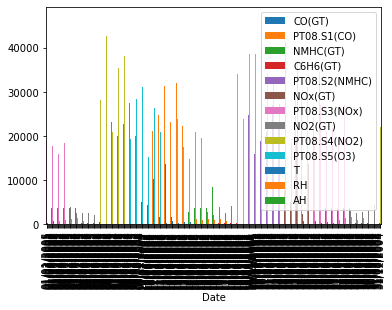

In [16]:
df_diario=df_diario.groupby('Date').sum().plot.bar()

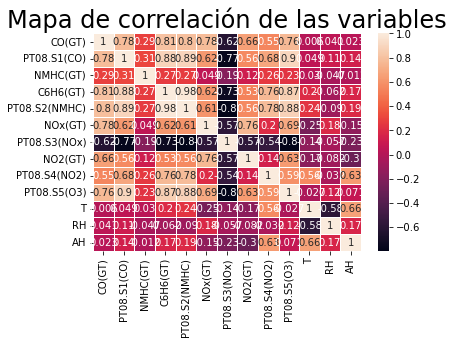

In [24]:
sns.heatmap(df.corr(),annot=True, linewidths=.5)
plt.title('Mapa de correlación de las variables',fontsize=24)
plt.show()

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC, SVR
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor   
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


import warnings
warnings.filterwarnings('ignore')

In [19]:
col = df.columns.tolist()[2:]
col

['CO(GT)',
 'PT08.S1(CO)',
 'NMHC(GT)',
 'C6H6(GT)',
 'PT08.S2(NMHC)',
 'NOx(GT)',
 'PT08.S3(NOx)',
 'NO2(GT)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'RH',
 'AH']

## Regresión lineal

In [101]:
X=df[col].drop('RH',1)     
Y=df['RH']   
SSca=StandardScaler()
Xs=SSca.fit_transform(X)    
X.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,0.7888


In [102]:
X_train, X_test, y_train, y_test=train_test_split(Xs,Y,test_size=0.3, random_state=0)
print('tamaño de la Data de entrenamiento:',X_train.shape)
print('tamaño de la Data de prueba:',X_test.shape)

tamaño de la Data de entrenamiento: (6549, 12)
tamaño de la Data de prueba: (2808, 12)


In [60]:
modelo_regresion_multiple = LinearRegression()

modelo_regresion_multiple.fit(X_train, y_train)

y_pred = modelo_regresion_multiple.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Error cuadrático medio (MSE): {:.2f}'.format(mse))
print('r2: {:.2f}'.format(r2))

Error cuadrático medio (MSE): 34.90
r2: 0.88


In [89]:
Nox =np.array([])
for i in X_test:
    Nox = np.append(Nox,i[3])
Nox

array([ 1.91353096, -0.02864678, -0.17909716, ...,  0.47741362,
        2.50165521, -0.56206179])

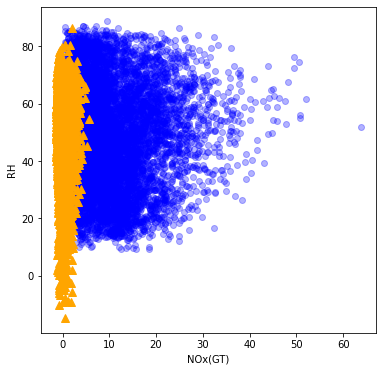

In [90]:
fig, ax = plt.subplots(figsize=(6,6))

ax.plot(X['C6H6(GT)'].values, Y.values, 'ob', alpha=0.3)
plt.plot(Nox, y_pred, '^', color='orange', ms=8)
ax.set_xlabel('NOx(GT)')
ax.set_ylabel('RH');

In [36]:
model= LinearRegression()
model.fit(X_train,y_train)
print('Intercept:',model.intercept_)

Intercept: 49.321095565062805


In [29]:
predi = model.predict(X_test)
predi

array([67.54017806, 64.07365772, 56.47618494, ..., 26.68839052,
       66.8452591 , 65.48401113])

In [30]:
y_test

6432    71.7
1452    67.4
7516    55.0
4856    53.4
1075    32.1
        ... 
7204    49.6
1759    56.2
4868    28.5
6328    68.5
4113    64.6
Name: RH, Length: 3743, dtype: float64

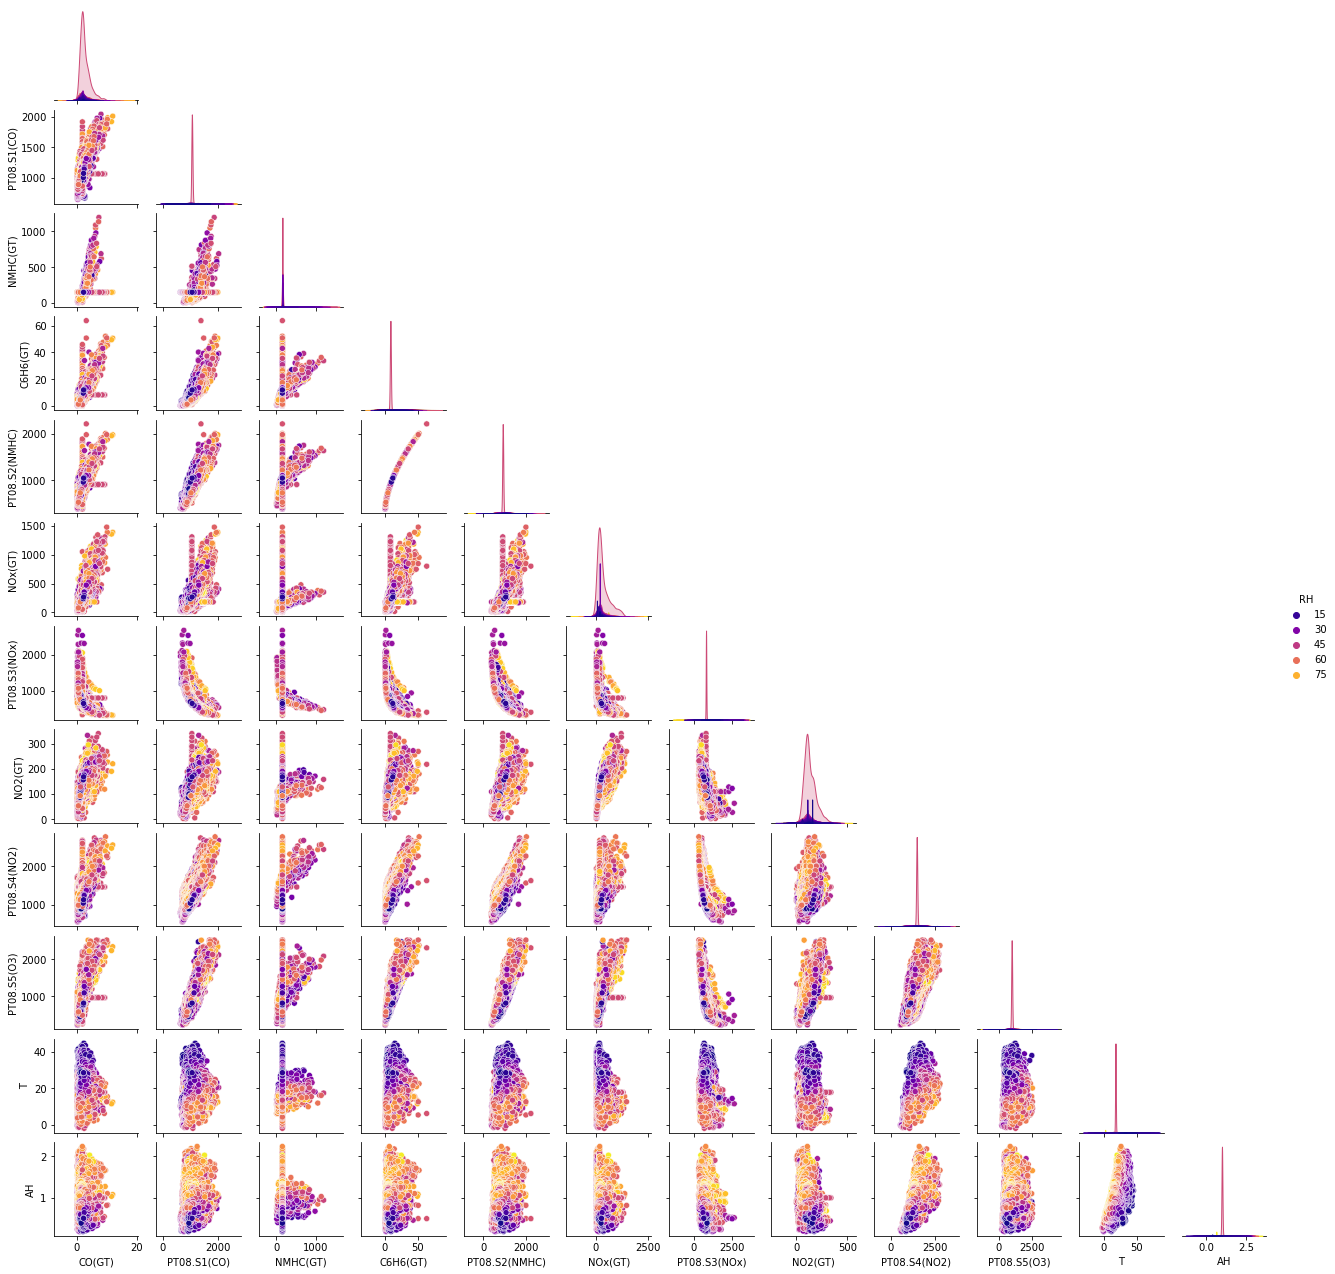

In [93]:
sns.pairplot(df, hue='RH',height=1.5, palette='plasma', corner = True);

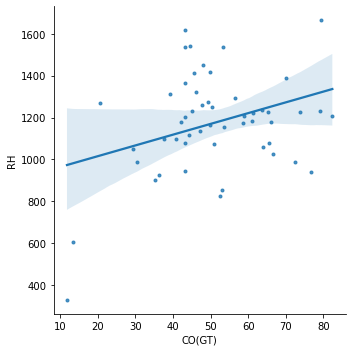

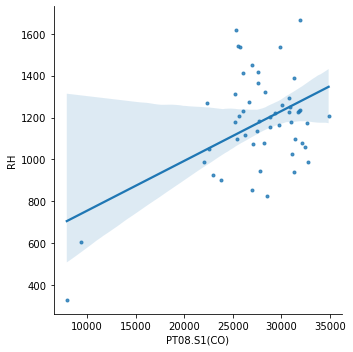

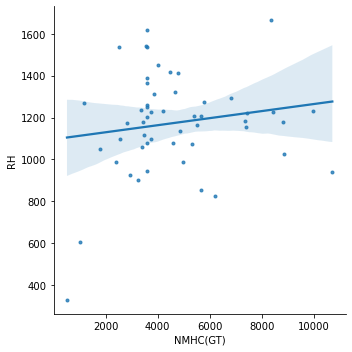

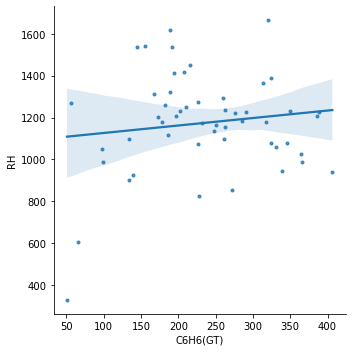

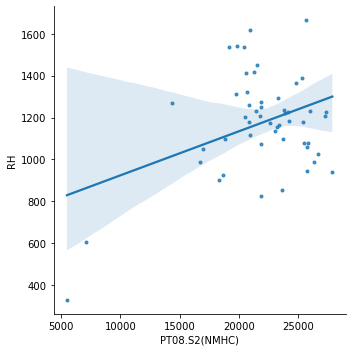

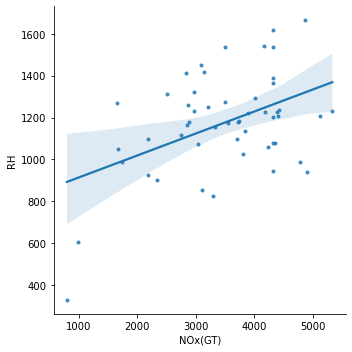

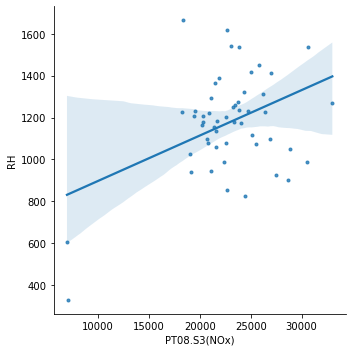

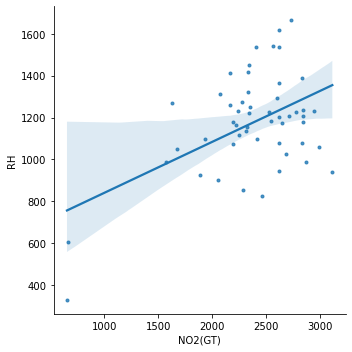

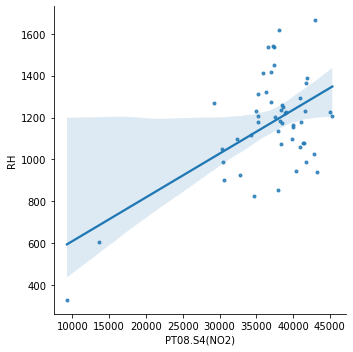

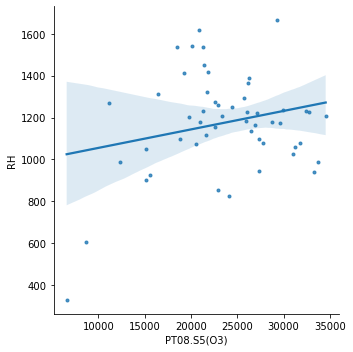

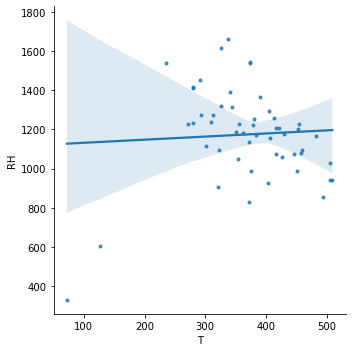

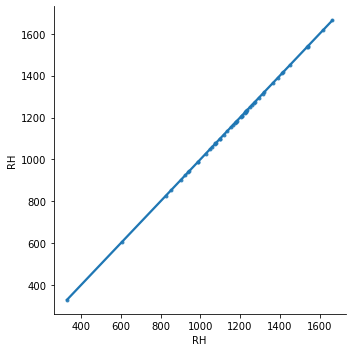

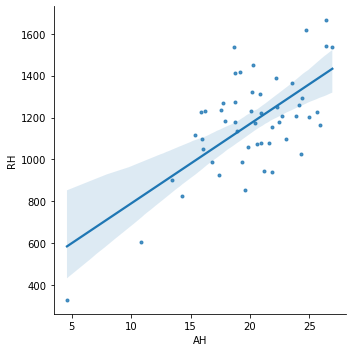

In [113]:
col1=df.columns.tolist()[2:]
for i in df.columns.tolist()[2:]:
    sns.lmplot(x=i,y='RH',data=df1,markers='.')

In [47]:
rs=np.sqrt(metrics.mean_squared_error(y_test,predi))
#print(rs)
print("\n")
print("Aplicando el método de 'Linear Regression' podemos predecir RH con un RSME=",rs)

5.907546009534437


Aplicando el método de 'Linear Regression' podemos predecir RH con un RSME= 5.907546009534437


## Randome Forest

In [95]:
modelRF=RandomForestRegressor()
modelRF.fit(X_train,y_train)

RandomForestRegressor()

In [97]:
prediRF=modelRF.predict(X_test) 
prediRF

array([32.287, 43.201, 45.993, ..., 63.414, 80.652, 31.317])

In [114]:
rs3=np.sqrt(metrics.mean_squared_error(y_test,prediRF))
print(rs3)
print("\n")
print("Aplicando el método de 'Random Forest' podemos predecir RH con un RSME=",rs3)

89.0334134229093


Aplicando el método de 'Random Forest' podemos predecir RH con un RSME= 89.0334134229093


In [104]:
from sklearn import preprocessing
df['target'] = df['RH']
le = preprocessing.LabelEncoder()
y = le.fit_transform(df[['C6H6(GT)']])
X = df.drop(columns=['C6H6(GT)']) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0 )

#### No entendí cuál era el error aquí :(

In [105]:
#df['target'] = df['RH']
arbol = DecisionTreeClassifier()
arbol.fit(X_train, y_train)

y_pred = arbol.predict(X_test)
print('Score: ', arbol.score(X_test, y_test))

matriz_confusion = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matriz_confusion).plot(cmap=plt.cm.Blues)

ValueError: could not convert string to float: '11/03/2005'

In [98]:
arbol = DecisionTreeClassifier()
arbol.fit(X_train, y_train)

y_pred = arbol.predict(X_test)

ValueError: Unknown label type: 'continuous'